# ***Szkolenie ML/AI 4***
### ***Sztuczne sieci neuronowe - klasyfikacja***

<div style="text-align: right;">
<small>Made by Aleksander Kołodziejczyk</small>
</div>


#!pip install -r requirements.txt


In [568]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [569]:
# 1. Załadowanie zbioru danych irysów
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [570]:
# 2. Wstępne przetwarzanie danych
# Normalizacja cech (standaryzacja)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konwersja etykiet do formatu One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)

y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Podział na zbiory treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.3, shuffle=True, random_state=42)

In [571]:
X_train.shape

(105, 4)

In [572]:
y_train.shape

(105, 3)

In [573]:
# 3. Budowa modelu sieci neuronowej
model = Sequential([                        # Normalizacja wsadowa
    Dense(16, input_dim=4, activation='elu'),   # Warstwa wejściowa + 1 warstwa ukryta
    BatchNormalization(),                          # Normalizacja wsadowa
    # Dropout(0.3),  
    
    Dense(3, activation='softmax')              # Warstwa wyjściowa z funkcją aktywacji softmax
])

/home/aleksander.kolodziej@A4BEE.ad/Desktop/lab--AI-ML--szkolenie--olson/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [574]:
# 4. Kompilacja modelu

# momentum = SGD(learning_rate=0.001, momentum=0.9, decay=0.0, nesterov=True)

# model.compile(optimizer=momentum, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [575]:
# Wyświetlenie struktury modelu
model.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)               │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 195 (780.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 32 (128.00 B)

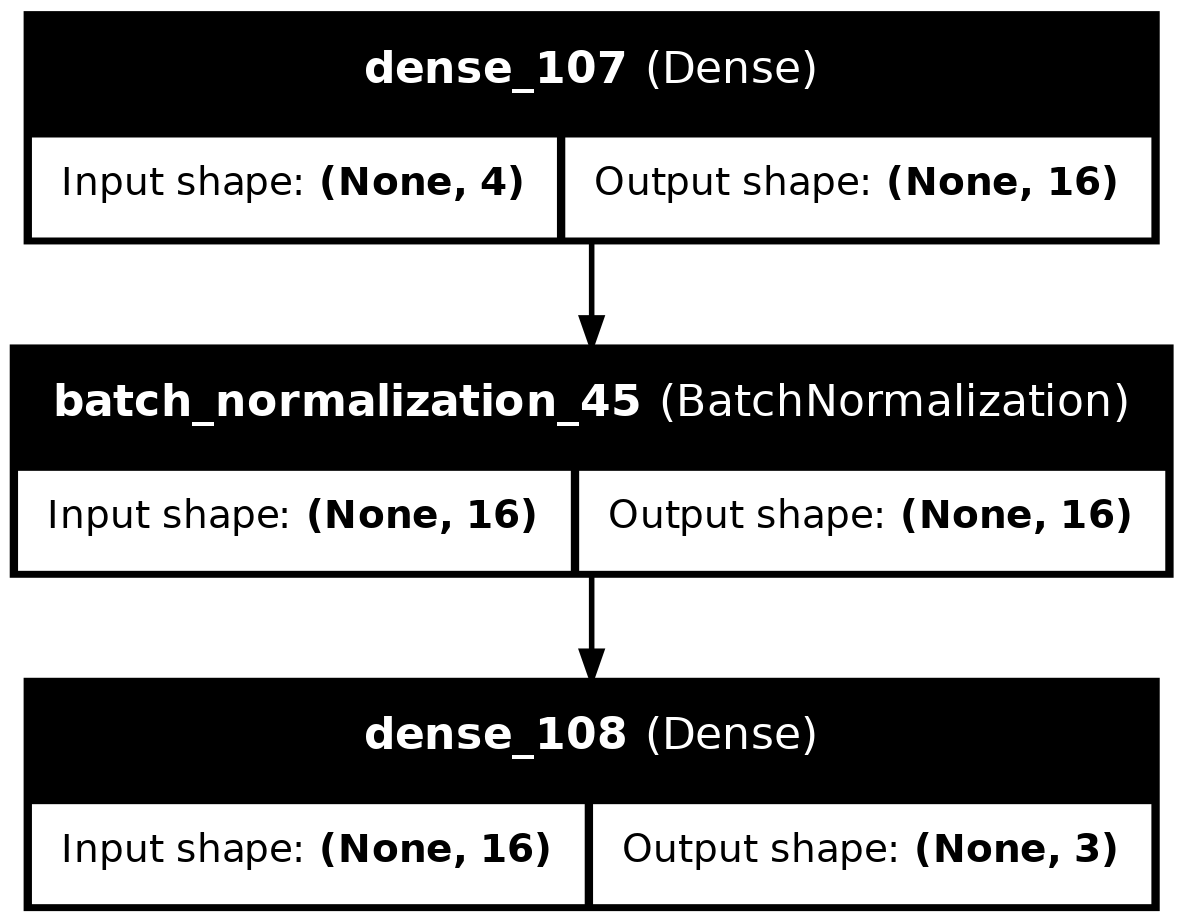

In [576]:
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

In [577]:
# 5. Trenowanie modelu
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=500, 
                    batch_size=30, 
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.1151 - loss: 3.2486 - val_accuracy: 0.1111 - val_loss: 1.7521
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0876 - loss: 3.1668 - val_accuracy: 0.1111 - val_loss: 1.7108
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1371 - loss: 3.0171 - val_accuracy: 0.1333 - val_loss: 1.6692
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1238 - loss: 2.9159 - val_accuracy: 0.1778 - val_loss: 1.6294
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2087 - loss: 2.7504 - val_accuracy: 0.1778 - val_loss: 1.5898
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1997 - loss: 2.6087 - val_accuracy: 0.2000 - val_loss: 1.5502
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1746 - loss: 2.4994 - val_accuracy: 0.2667 - val_loss: 1.5103
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2517 - loss: 2.3757 - val_accuracy: 0.2667 - val_loss: 1.47

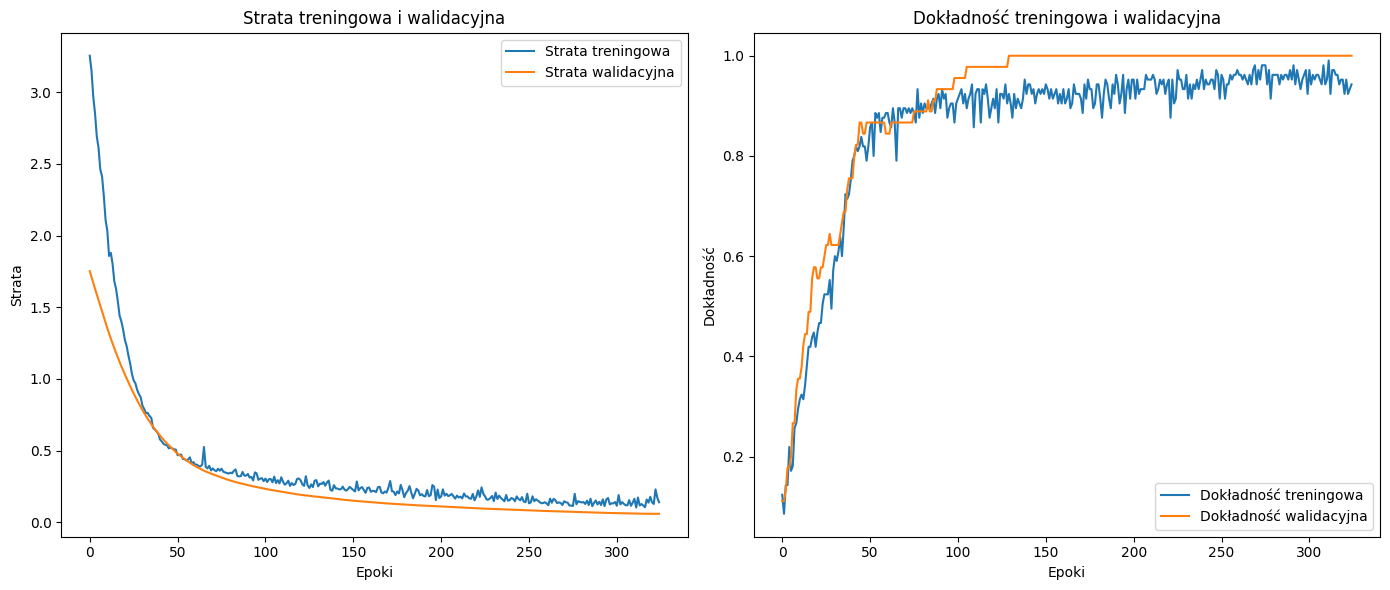

In [578]:
# 6. Wizualizacja wyników

# Wykres strat treningowych i walidacyjnych
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.title('Strata treningowa i walidacyjna')

# Wykres dokładności treningowej i walidacyjnej
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Dokładność treningowa i walidacyjna')

plt.tight_layout()
plt.show()

In [579]:
# 7. Ocena modelu
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=10)
print(f'Dokładność modelu na zbiorze testowym: {test_accuracy:.2f}')

Dokładność modelu na zbiorze testowym: 1.00


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


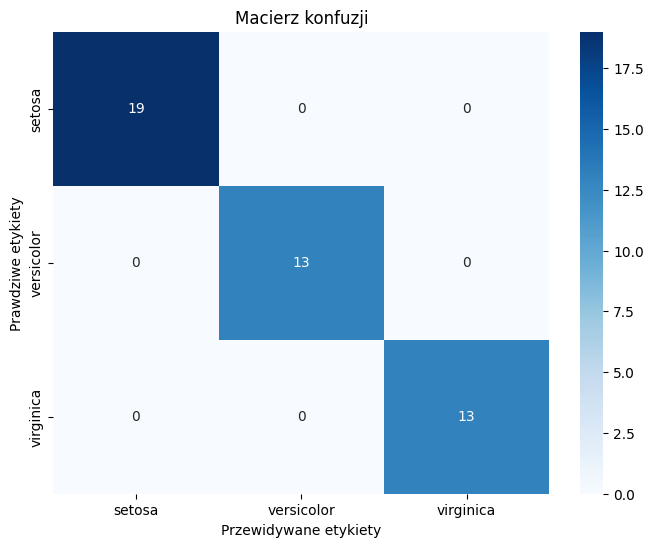

In [580]:
# 8. Macierz konfuzji
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Przewidywanie klas na zbiorze testowym
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Obliczanie macierzy konfuzji
cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz konfuzji')
plt.show()
